# 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Improve the input data, make sure to clean the data as good as possible free from error if possible
2. Use data augmentatition to increase the data variety and make the model train to various type
3. Transfer learning can be applied using a model that is already good with solving problem

# 2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test DataLoader's ready to use.

## 2.1

In [1]:
# Import torch
import torch
from torch import nn

# Setup device
device = "cuda" if torch.cuda.is_available() else "cpu"


In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("Data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

image_path

Did not find Data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


PosixPath('Data/pizza_steak_sushi')

In [3]:
# Become one with data
import os
def walk_through_dir(dir_path):
  """Walk through dir_path returning file counts of its contents"""
  for dirpath,dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and len({filenames}) images in '{dirpath}")

walk_through_dir(image_path)

There are 2 directories and len([]) images in 'Data/pizza_steak_sushi
There are 3 directories and len([]) images in 'Data/pizza_steak_sushi/train
There are 0 directories and len(['390178.jpg', '2323548.jpg', '1551817.jpg', '2004525.jpg', '121940.jpg', '2175561.jpg', '1280119.jpg', '2674024.jpg', '700405.jpg', '1138695.jpg', '1957449.jpg', '2797464.jpg', '2871052.jpg', '840444.jpg', '385154.jpg', '821108.jpg', '2492146.jpg', '1232045.jpg', '542188.jpg', '1575445.jpg', '2980779.jpg', '1129338.jpg', '424994.jpg', '1615453.jpg', '377047.jpg', '2021381.jpg', '2574453.jpg', '3353428.jpg', '1214108.jpg', '2021685.jpg', '200025.jpg', '3251688.jpg', '3426958.jpg', '773725.jpg', '2120573.jpg', '307738.jpg', '3579071.jpg', '2873571.jpg', '1571146.jpg', '148799.jpg', '2720223.jpg', '794647.jpg', '855721.jpg', '14046.jpg', '710379.jpg', '929471.jpg', '3004029.jpg', '170385.jpg', '765684.jpg', '169392.jpg', '2017378.jpg', '2813454.jpg', '1552504.jpg', '2590819.jpg', '17704.jpg', '3360207.jpg', '3737

In [4]:
# Seting up training and testing paths
train_directory = image_path / "train"
testing_directory = image_path / "test"

train_directory, testing_directory

(PosixPath('Data/pizza_steak_sushi/train'),
 PosixPath('Data/pizza_steak_sushi/test'))

## 2.2

Path of random image that i choose:  Data/pizza_steak_sushi/train/pizza/1899785.jpg
The image class of random image:  pizza
Random image path: Data/pizza_steak_sushi/train/pizza/1899785.jpg
Image Class: pizza
Image height: 512
Image width: 512


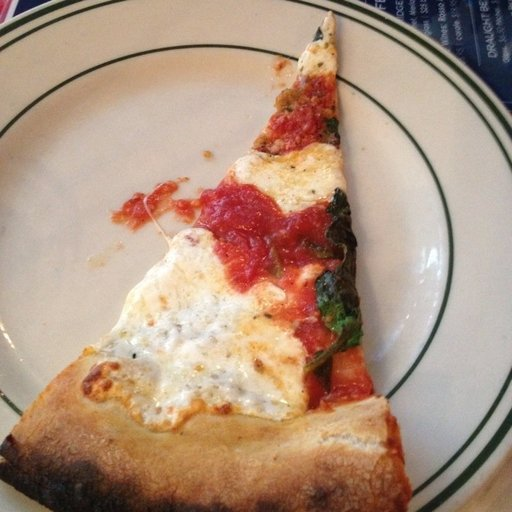

In [5]:
# Visualizing an image
import random
from PIL import Image

# 1. get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # It means to take what ever .jpg file

# 2. Pick random image
random_image_path = random.choice(image_path_list)
print("Path of random image that i choose: ", random_image_path)

# 3. Get image class from the path name
image_class = random_image_path.parent.stem
print("The image class of random image: ", image_class)

# 4. Open image
image = Image.open(random_image_path)

# 5. Print metadata of the image
print(f"Random image path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image height: {image.height}")
print(f"Image width: {image.width}")
image

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

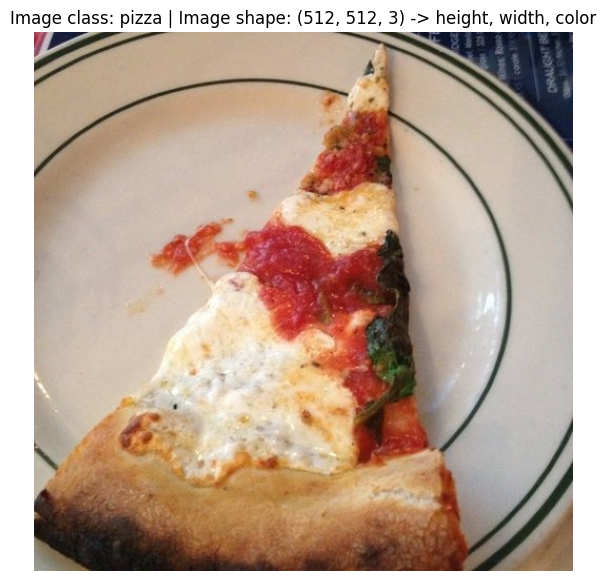

In [6]:
# Visulizing image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into array
image_as_array = np.asarray(image)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} -> height, width, color")
plt.axis(False)

## 2.3

In [7]:
# Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

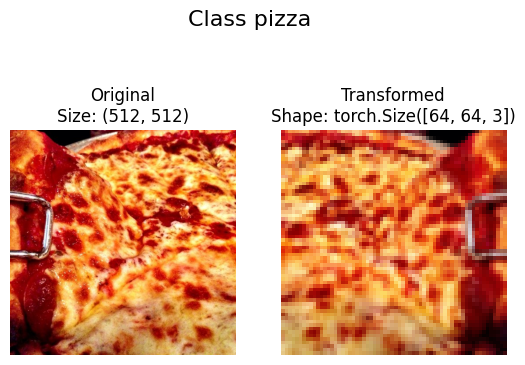

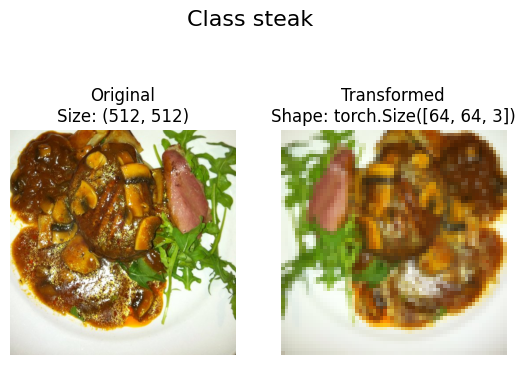

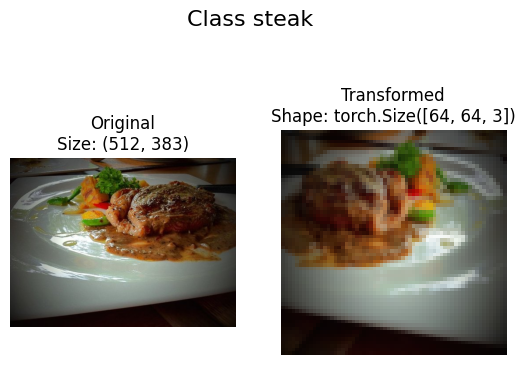

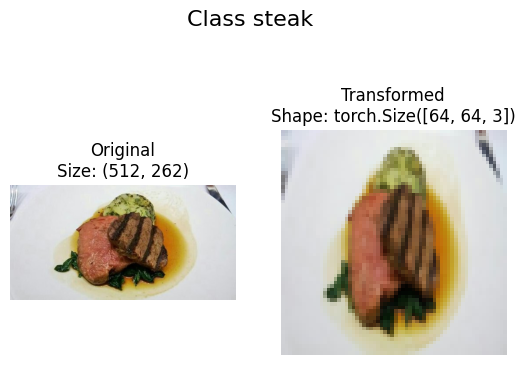

In [9]:
def plot_transformed_images(image_paths: list, transform, number_image, seed=None):
  if seed:
    random.seed(seed)
  random_image_path = random.sample(image_paths, k=number_image)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths= image_path_list,
                        transform=data_transform,
                        number_image=4)

## 2.4

In [10]:
# Use image folder to create dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_directory,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = testing_directory,
                                 transform= data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [11]:
# Get class names as list
class_names = train_data.classes
class_names


['pizza', 'steak', 'sushi']

In [12]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [13]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [14]:
# Turn train and test datasets to dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader (dataset = test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f86a488a4d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f86a48c3f90>)

In [15]:
# How many batch of images in our dataloader
print(f"Batch size for train: {len(train_dataloader)} and test: {len(test_dataloader)}")

Batch size for train: 225 and test: 75


## 2.5

In [16]:
# Model 0

# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# Loading image data
from torchvision import datasets
train_data_0 = datasets.ImageFolder(root = train_directory,
                                    transform= simple_transform,
                                    target_transform= None)

test_data_0 = datasets.ImageFolder(root= testing_directory,
                                   transform= simple_transform)


In [17]:
# Turn loaded image into dataloader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_0 = DataLoader(dataset = train_data_0,
                                batch_size = BATCH_SIZE,
                                num_workers=1,
                                shuffle=True)

test_dataloader_0 = DataLoader(dataset = test_data_0,
                                batch_size = BATCH_SIZE,
                                num_workers = 1,
                                shuffle=False)

train_dataloader_0, test_dataloader_0

(<torch.utils.data.dataloader.DataLoader at 0x7f86a48a1e90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f86a48a0b10>)

In [18]:
# Creating tinyVGG model
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_unit: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels= hidden_unit,
                  kernel_size= 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2,
                     stride = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels= hidden_unit,
                  kernel_size= 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2,
                     stride = 2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features = hidden_unit * 13 * 13,
                  out_features = output_shape)
    )

  def forward (self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [19]:
# Assign model to the model architecture
model_0 = TinyVGG(input_shape = 3,
                  hidden_unit= 10,
                  output_shape = len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [20]:
# Summary of the model
try:
  import torchinfo
except:
  !pip install torchinfo
  import torch

from torchinfo import summary

summary(model_0, input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 2.6

In [21]:
# Create train, test functions and the real training part

# Train step
def train_step(model : torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
  # Put the model in training mode
  model.train()

  # Setup train loss and train accuracy initial values
  train_loss, train_accuracy = 0, 0

  # Loop through data loader and data batches
  for batch, (X,y) in enumerate(data_loader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimzer step
    optimizer.step()

    # Calculate and accumulate accuracy metric accross all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim =1), dim=1)
    train_accuracy += (y_pred_class == y).sum(). item() / len(y)

  # Adjust metrics to get average loss and average accuracy per batch
  return train_loss / len(data_loader), train_accuracy / len(data_loader)


# Test step
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
  test_loss, test_acc = 0, 0

  model.eval()

  # Use inference mode
  with torch.inference_mode():
    for batch, (X,y) in enumerate(data_loader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (output raw logits)
      test_pred_logits = model(X)

      # 2. Calculate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # 3. Calculate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item() / len(y))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test loss average per batch
    test_acc /= len(data_loader)

  # Print out
  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
  return test_loss, test_acc

# The real training step that combine 2 above
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          device = device):
  results = {
      "train_loss" : [],
      "train_accuracy": [],
      "test_loss": [],
      "test_acc": []
  }

  for epoch in range(epochs):
    train_loss, train_accuracy = train_step(
        model = model,
        data_loader = train_dataloader,
        loss_fn=loss_fn,
        optimizer = optimizer,
        device = device
    )
    test_loss, test_acc = test_step(
        model = model,
        data_loader = test_dataloader,
        loss_fn = loss_fn,
        device = device
    )

    print(f"Epoch {epoch+1}: "
          f"Train loss: {train_loss:.4f} | Train acc: {train_accuracy:.4f} | "
          f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    results["train_loss"].append(train_loss)
    results["train_accuracy"].append(train_accuracy)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

## 2.7

In [22]:
# Train for 5 epoch
NUM_EPOCHS = 5

# Recreate an instance of tinyVGG
model_0 = TinyVGG (input_shape = 3,
                   hidden_unit = 10,
                   output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_timer = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_0,
                        test_dataloader = test_dataloader_0,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long
end_timer = timer()
print(f"Total training time: {end_timer - start_timer:.3f} seconds")

Test loss: 1.10639 | Test acc: 0.26%
Epoch 1: Train loss: 1.0946 | Train acc: 0.4297 | Test loss: 1.1064 | Test acc: 0.2604
Test loss: 1.11484 | Test acc: 0.26%
Epoch 2: Train loss: 1.1042 | Train acc: 0.3047 | Test loss: 1.1148 | Test acc: 0.2604
Test loss: 1.11243 | Test acc: 0.32%
Epoch 3: Train loss: 1.1054 | Train acc: 0.2852 | Test loss: 1.1124 | Test acc: 0.3229
Test loss: 1.09549 | Test acc: 0.36%
Epoch 4: Train loss: 1.0856 | Train acc: 0.5195 | Test loss: 1.0955 | Test acc: 0.3627
Test loss: 1.08194 | Test acc: 0.35%
Epoch 5: Train loss: 1.0753 | Train acc: 0.4805 | Test loss: 1.0819 | Test acc: 0.3513
Total training time: 11.746 seconds


In [23]:
# Train for 20 epochs
NUM_EPOCHS = 20

# Recreate an instance of tinyVGG
model_0 = TinyVGG (input_shape = 3,
                   hidden_unit = 10,
                   output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_timer = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_0,
                        test_dataloader = test_dataloader_0,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long
end_timer = timer()
print(f"Total training time: {end_timer - start_timer:.3f} seconds")

Test loss: 1.09845 | Test acc: 0.26%
Epoch 1: Train loss: 1.1149 | Train acc: 0.2500 | Test loss: 1.0985 | Test acc: 0.2604
Test loss: 1.11002 | Test acc: 0.26%
Epoch 2: Train loss: 1.1045 | Train acc: 0.3008 | Test loss: 1.1100 | Test acc: 0.2604
Test loss: 1.10538 | Test acc: 0.20%
Epoch 3: Train loss: 1.0972 | Train acc: 0.4102 | Test loss: 1.1054 | Test acc: 0.1979
Test loss: 1.10557 | Test acc: 0.26%
Epoch 4: Train loss: 1.0991 | Train acc: 0.2773 | Test loss: 1.1056 | Test acc: 0.2604
Test loss: 1.09991 | Test acc: 0.26%
Epoch 5: Train loss: 1.0991 | Train acc: 0.3125 | Test loss: 1.0999 | Test acc: 0.2604
Test loss: 1.10366 | Test acc: 0.20%
Epoch 6: Train loss: 1.0947 | Train acc: 0.4258 | Test loss: 1.1037 | Test acc: 0.1979
Test loss: 1.10814 | Test acc: 0.22%
Epoch 7: Train loss: 1.0980 | Train acc: 0.3125 | Test loss: 1.1081 | Test acc: 0.2188
Test loss: 1.11111 | Test acc: 0.26%
Epoch 8: Train loss: 1.0828 | Train acc: 0.4844 | Test loss: 1.1111 | Test acc: 0.2604
Test los

In [24]:
# Train for 50 epoch
NUM_EPOCHS = 50

# Recreate an instance of tinyVGG
model_0 = TinyVGG (input_shape = 3,
                   hidden_unit = 10,
                   output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_timer = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_0,
                        test_dataloader = test_dataloader_0,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long
end_timer = timer()
print(f"Total training time: {end_timer - start_timer:.3f} seconds")

Test loss: 1.11212 | Test acc: 0.26%
Epoch 1: Train loss: 1.1073 | Train acc: 0.2656 | Test loss: 1.1121 | Test acc: 0.2604
Test loss: 1.12646 | Test acc: 0.20%
Epoch 2: Train loss: 1.1159 | Train acc: 0.2773 | Test loss: 1.1265 | Test acc: 0.1979
Test loss: 1.08932 | Test acc: 0.57%
Epoch 3: Train loss: 1.0989 | Train acc: 0.3203 | Test loss: 1.0893 | Test acc: 0.5729
Test loss: 1.08711 | Test acc: 0.26%
Epoch 4: Train loss: 1.0932 | Train acc: 0.4180 | Test loss: 1.0871 | Test acc: 0.2604
Test loss: 1.04919 | Test acc: 0.26%
Epoch 5: Train loss: 1.0697 | Train acc: 0.3008 | Test loss: 1.0492 | Test acc: 0.2595
Test loss: 1.07512 | Test acc: 0.30%
Epoch 6: Train loss: 1.0429 | Train acc: 0.4570 | Test loss: 1.0751 | Test acc: 0.3021
Test loss: 1.10841 | Test acc: 0.29%
Epoch 7: Train loss: 1.0262 | Train acc: 0.4180 | Test loss: 1.1084 | Test acc: 0.2917
Test loss: 1.01870 | Test acc: 0.36%
Epoch 8: Train loss: 0.9800 | Train acc: 0.4453 | Test loss: 1.0187 | Test acc: 0.3617
Test los

In [25]:
# Add more hidden units
# Train for 20 epoch
NUM_EPOCHS = 20

# Recreate an instance of tinyVGG
model_0 = TinyVGG (input_shape = 3,
                   hidden_unit = 20,
                   output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_timer = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_0,
                        test_dataloader = test_dataloader_0,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long
end_timer = timer()
print(f"Total training time: {end_timer - start_timer:.3f} seconds")

Test loss: 1.09891 | Test acc: 0.26%
Epoch 1: Train loss: 1.1170 | Train acc: 0.2773 | Test loss: 1.0989 | Test acc: 0.2604
Test loss: 1.12040 | Test acc: 0.20%
Epoch 2: Train loss: 1.1069 | Train acc: 0.3008 | Test loss: 1.1204 | Test acc: 0.1979
Test loss: 1.09352 | Test acc: 0.43%
Epoch 3: Train loss: 1.0962 | Train acc: 0.3164 | Test loss: 1.0935 | Test acc: 0.4318
Test loss: 1.07945 | Test acc: 0.38%
Epoch 4: Train loss: 1.0860 | Train acc: 0.4648 | Test loss: 1.0794 | Test acc: 0.3816
Test loss: 1.04888 | Test acc: 0.44%
Epoch 5: Train loss: 1.0484 | Train acc: 0.5977 | Test loss: 1.0489 | Test acc: 0.4422
Test loss: 0.99364 | Test acc: 0.47%
Epoch 6: Train loss: 1.0099 | Train acc: 0.4414 | Test loss: 0.9936 | Test acc: 0.4735
Test loss: 0.95493 | Test acc: 0.49%
Epoch 7: Train loss: 0.9341 | Train acc: 0.4688 | Test loss: 0.9549 | Test acc: 0.4943
Test loss: 0.94970 | Test acc: 0.48%
Epoch 8: Train loss: 0.8786 | Train acc: 0.5859 | Test loss: 0.9497 | Test acc: 0.4839
Test los

## 2.8

In [26]:
# Download 20% data for food
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
  print(f"{image_path} already exist")
else:
  print("Downloading now")
  image_path.mkdir(parents=True, exist_ok = True)

# Download pizza , steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
  print("Downloading")
  f.write(request.content)

# Unzip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
  print("Unzipping file")
  zip_ref.extractall(image_path)


Downloading
Unzipping file


In [27]:
walk_through_dir(image_path)

There are 2 directories and len([]) images in 'data/pizza_steak_sushi_20_percent
There are 3 directories and len([]) images in 'data/pizza_steak_sushi_20_percent/train
There are 0 directories and len(['794736.jpg', '2937874.jpg', '3337386.jpg', '1674187.jpg', '390178.jpg', '20588.jpg', '2323548.jpg', '308627.jpg', '3191504.jpg', '1659155.jpg', '1551817.jpg', '2004525.jpg', '3600867.jpg', '3157863.jpg', '121940.jpg', '2175561.jpg', '1280119.jpg', '2674024.jpg', '2507003.jpg', '2120484.jpg', '766596.jpg', '1138695.jpg', '920703.jpg', '2087002.jpg', '1429127.jpg', '3590238.jpg', '852186.jpg', '1957449.jpg', '2797464.jpg', '932954.jpg', '2871052.jpg', '1152316.jpg', '385154.jpg', '414450.jpg', '821108.jpg', '1179238.jpg', '2634094.jpg', '1232045.jpg', '1422524.jpg', '1575445.jpg', '2980779.jpg', '1085066.jpg', '310820.jpg', '999858.jpg', '1129338.jpg', '1033302.jpg', '285268.jpg', '424994.jpg', '638929.jpg', '1615453.jpg', '377047.jpg', '2021381.jpg', '1930318.jpg', '1717393.jpg', '2574453

In [28]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [29]:
# Turn the 20 percent datapath into datasets and dataloaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

# Create datasets
# Use image folder to create dataset
from torchvision import datasets
train_data_20 = datasets.ImageFolder(root=train_data_20_percent_path,
                                  transform=simple_transform,
                                  target_transform=None)

test_data_20 = datasets.ImageFolder(root = test_data_20_percent_path,
                                 transform= data_transform)

train_data_20, test_data_20

# Create dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_20 = DataLoader(dataset = train_data_20,
                              batch_size = BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader_20 = DataLoader (dataset = test_data_20,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)

train_dataloader_20,test_dataloader_20

(<torch.utils.data.dataloader.DataLoader at 0x7f86a482c510>,
 <torch.utils.data.dataloader.DataLoader at 0x7f86e1b80f50>)

In [30]:
# Add more hidden units
# Train for 20 epoch
NUM_EPOCHS = 20

# Recreate an instance of tinyVGG
model_0 = TinyVGG (input_shape = 3,
                   hidden_unit = 20,
                   output_shape = len(train_data.classes)).to(device)

# Setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

# Start the timer
from timeit import default_timer as timer
start_timer = timer()

# Train model_0
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_20,
                        test_dataloader = test_dataloader_20,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long
end_timer = timer()
print(f"Total training time: {end_timer - start_timer:.3f} seconds")

Test loss: 1.09639 | Test acc: 0.36%
Epoch 1: Train loss: 1.1019 | Train acc: 0.2958 | Test loss: 1.0964 | Test acc: 0.3642
Test loss: 1.08506 | Test acc: 0.41%
Epoch 2: Train loss: 1.0935 | Train acc: 0.3625 | Test loss: 1.0851 | Test acc: 0.4125
Test loss: 1.02927 | Test acc: 0.49%
Epoch 3: Train loss: 1.0725 | Train acc: 0.3812 | Test loss: 1.0293 | Test acc: 0.4875
Test loss: 0.95890 | Test acc: 0.56%
Epoch 4: Train loss: 0.9673 | Train acc: 0.4708 | Test loss: 0.9589 | Test acc: 0.5642
Test loss: 0.96999 | Test acc: 0.53%
Epoch 5: Train loss: 0.9774 | Train acc: 0.5229 | Test loss: 0.9700 | Test acc: 0.5273
Test loss: 0.93596 | Test acc: 0.58%
Epoch 6: Train loss: 0.9968 | Train acc: 0.5229 | Test loss: 0.9360 | Test acc: 0.5756
Test loss: 0.97121 | Test acc: 0.48%
Epoch 7: Train loss: 0.8539 | Train acc: 0.6458 | Test loss: 0.9712 | Test acc: 0.4807
Test loss: 0.90537 | Test acc: 0.59%
Epoch 8: Train loss: 0.8767 | Train acc: 0.5938 | Test loss: 0.9054 | Test acc: 0.5892
Test los

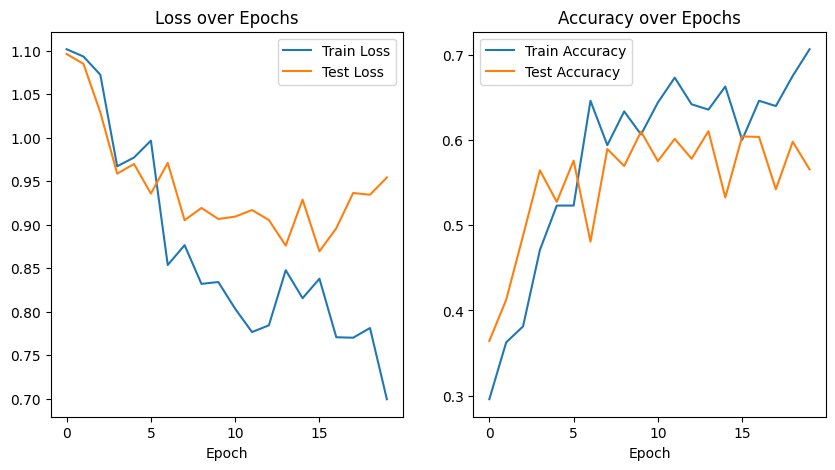

In [31]:
# Plotting the training curve
import matplotlib.pyplot as plt

def plot_results(results_dict):
    plt.figure(figsize=(10, 5))
    epochs = range(len(results_dict["train_loss"]))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results_dict["train_loss"], label="Train Loss")
    plt.plot(epochs, results_dict["test_loss"], label="Test Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results_dict["train_accuracy"], label="Train Accuracy")
    plt.plot(epochs, results_dict["test_acc"], label="Test Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

plot_results(model_0_results)


In [45]:
# Predict and plot the image
from PIL import Image
import torch
import matplotlib.pyplot as plt

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = Image.open(image_path).convert("RGB")

    # 2. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 3. Make sure the model is on the target device
    model.to(device)

    # 4. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 5. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 6. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 7. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

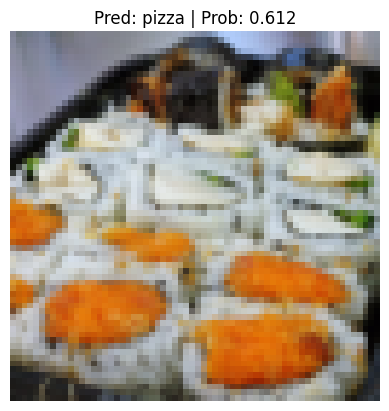

In [59]:
import random

# Pick a random test image
random_image_path = random.choice(list(test_data_20.imgs))[0]

# Predict and plot
pred_and_plot_image(model=model_0,
                    image_path=random_image_path,
                    class_names=class_names,
                    transform=simple_transform,
                    device=device)